<a href="https://colab.research.google.com/github/fambargh/leaf_pro/blob/main/attaching_csv_annotation_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [3]:
# read the csv file using read_csv function of pandas
train = pd.read_csv('/content/via_project_4Jan2021_11h18m_json.csv')
train.head()

,image_names,name,cx,cy,r,region_attributes/f,x,y,width,height,region_attributes/h
0,R1_10_2.jpg,circle,1659.0,746.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN
1,R1_10_2.jpg,circle,1101.0,566.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN
2,R1_10_2.jpg,circle,1123.0,775.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN
3,R1_10_2.jpg,circle,1239.0,1149.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN
4,R1_10_2.jpg,circle,2160.0,437.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN


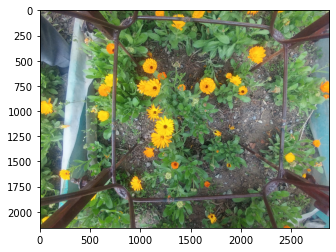

In [4]:
# reading single image using imread function of matplotlib
image = plt.imread('/content/R1_10_2.jpg')
plt.imshow(image)


In [5]:
# Number of unique training images
train['image_names'].nunique()

1

In [6]:
# Number of classes
train['name'].value_counts()

circle    21
rect       2
Name: name, dtype: int64

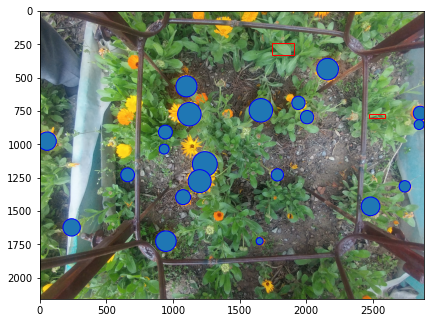

In [11]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('/content/R1_10_2.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.image_names == "R1_10_2.jpg"].iterrows():
    xmin = row.x
    width = row.width
    ymin = row.y
    height = row.height
    cx=row.cx
    cy=row.cy
    r=row.r 
    
    # assign different color to different classes of objects
    if row.name == 'circle':
        edgecolor = 'r'
       ## ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.name == 'rect':
        edgecolor = 'b'
        ax.annotate('rect', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = 'r', facecolor = 'none')
    circle=patches.Circle((cx,cy), radius=r, edgecolor = 'b')
    
    ax.add_patch(rect)
    ax.add_patch(circle)